# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv')
products = pd.read_csv('/datasets/products.csv')
aisles = pd.read_csv('/datasets/aisles.csv')
departments = pd.read_csv('/datasets/departments.csv')
order_products = pd.read_csv('/datasets/order_products.csv')

In [3]:
orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count   Dtype 
---  ------                                                                            --------------   ----- 
 0   order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order  478967 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   product_id;product_name;aisle_id;department_id  49694 non-null  object
dtypes: object(1)
memory usage: 388.4+ KB


In [5]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   aisle_id;aisle  134 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


In [6]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   department_id;department  21 non-null     object
dtypes: object(1)
memory usage: 296.0+ bytes


In [7]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 1 columns):
 #   Column                                           Non-Null Count    Dtype 
---  ------                                           --------------    ----- 
 0   order_id;product_id;add_to_cart_order;reordered  4545007 non-null  object
dtypes: object(1)
memory usage: 34.7+ MB


## Conclusiones

Al analizar los resultados de la carga de datos, se observa que todos los archivos se están leyendo incorrectamente. Cada DataFrame tiene una única columna de tipo object que contiene todas las cabeceras y datos concatenados en una sola cadena. Esto sugiere que los archivos CSV no están delimitados por comas, sino probablemente por punto y coma ;. Este problema impide que pandas separe correctamente las columnas. 


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

En este paso se realizará el preprocesamiento de todos los DataFrames (orders, products, aisles, departments y order_products). Primero, se verificarán y corregirán los tipos de datos, asegurando que las columnas de ID y otras numéricas estén en el formato correcto (por ejemplo, enteros o flotantes). Luego, se identificarán los valores ausentes en cada tabla; si los hay, se decidirá si deben eliminarse o completarse, dependiendo de su cantidad e impacto en el análisis. También se revisará si existen filas duplicadas completas y, en caso afirmativo, se eliminarán después de entender su origen. Además, se comprobará si hay identificadores clave (como order_id o product_id) duplicados, lo cual podría indicar errores en la estructura de los datos. Finalmente, se documentarán todos los hallazgos, las acciones tomadas y las razones para cada decisión, con el objetivo de dejar los datos limpios y listos para el análisis exploratorio.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
orders.duplicated().sum()

15

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

In [10]:
orders = orders.drop_duplicates()

In [11]:
orders.duplicated().sum()

0

In [12]:
orders['order_id'].duplicated().sum()

0

Se identifica si hay datos duplicados, al obtener la resouesta de que hay 15 datos duplicados, se vuelven a cargar los Dataframes ahora ocn el separador correcto que es el ; para revisar los pedidos realizados el miercoles a las 2, después se eliminan los pedidos duplicados y se revisa si el codigo estuvo bien ejecutado

### `products` data frame

In [13]:
products.duplicated().sum()


0

In [14]:
products['product_id'].duplicated().sum()


0

In [15]:
products['product_name_upper'] = products['product_name'].str.upper()
products['product_name_upper'].duplicated().sum()

1361

In [16]:
products[products['product_name'].notna()]['product_name_upper'].duplicated().sum()

104

Al revisar el DataFrame products, no se encontraron filas completamente duplicadas ni IDs de producto repetidos, lo que indica una estructura de datos consistente en cuanto a identificadores únicos. Sin embargo, se identificaron 1.361 nombres de productos duplicados al normalizar a mayúsculas, de los cuales al menos 104 correspondían a nombres no nulos. Esto sugiere que existen productos distintos con nombres iguales, posiblemente debido a diferencias no visibles como tamaño, marca u otros atributos. Por esta razón, no se eliminaron registros, pero este hallazgo se tendrá en cuenta para futuras tareas de limpieza o agrupación.

### `departments` data frame

In [17]:
departments.duplicated().sum()

0

In [18]:
departments['department_id'].duplicated().sum()

0

Al analizar el DataFrame departments, se encontró que no existen filas completamente duplicadas ni IDs de departamento repetidos. Esto indica que la estructura de esta tabla es consistente, sin datos redundantes ni identificadores conflictivos. Por lo tanto, no fue necesario realizar ninguna modificación o limpieza en este conjunto de datos.

### `aisles` data frame

In [19]:
aisles.duplicated().sum()

0

In [20]:
aisles['aisle_id'].duplicated().sum()

0

Al revisar el DataFrame aisles, no se encontraron filas completamente duplicadas ni IDs de pasillos repetidos. Esto indica que la tabla está limpia y correctamente estructurada, sin necesidad de aplicar transformaciones o depuraciones adicionales.

### `order_products` data frame

In [21]:
order_products.duplicated().sum()


0

In [22]:
order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered']).sum()

0

Se revisaron las filas del DataFrame order_products en busca de duplicados. No se encontraron filas totalmente duplicadas ni combinaciones duplicadas en las columnas order_id, product_id, add_to_cart_order y reordered. Por lo tanto, no fue necesario eliminar registros en esta etapa.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
missing_products = products[products['product_name'].isnull()]
print("Número de productos con nombre ausente:", len(missing_products))
display(missing_products)

Número de productos con nombre ausente: 1258


,product_id,product_name,aisle_id,department_id,product_name_upper
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


Se encontraron 1258 productos en el DataFrame products que no tienen nombre. Todos estos productos comparten el mismo aisle_id (100) y department_id (21), lo que indica que el problema de datos está concentrado en una sola sección del inventario.

In [24]:
print("Pasillos asociados a productos con nombre ausente:")
print(missing_products['aisle_id'].unique())

Pasillos asociados a productos con nombre ausente:
[100]


Todos los productos sin nombre están asociados al pasillo 100, lo que sugiere que el error podría estar relacionado con un problema específico en el registro de productos de ese pasillo.

In [25]:
print("Departamentos asociados a productos con nombre ausente:")
print(missing_products['department_id'].unique())

Departamentos asociados a productos con nombre ausente:
[21]


Los productos con nombre ausente pertenecen exclusivamente al departamento 21, lo cual refuerza la hipótesis de que la ausencia de nombres está focalizada en una sola categoría del catálogo de productos.

In [26]:
pasillo_100 = aisles[aisles['aisle_id'] == 100]
departamento_21 = departments[departments['department_id'] == 21]
display(pasillo_100)
display(departamento_21)

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


Se verificó que el aisle_id 100 y el department_id 21, donde se concentran todos los productos sin nombre, están etiquetados como "missing" en sus respectivos DataFrames (aisles y departments). Esto indica que la ausencia de nombres no es un error aleatorio, sino que se debe a una categoría general de productos no clasificados o no especificados correctamente en la base de datos.

In [27]:
products['product_name'].fillna('Unknown', inplace=True)

Dado que 1258 productos presentaban valores nulos en la columna product_name, se decidió reemplazar estos valores ausentes con la etiqueta 'Unknown' utilizando el método .fillna(). Esta estrategia permite conservar la integridad del DataFrame sin eliminar registros, facilitando futuros análisis sin perder información estructural relevante.

### `orders` data frame

In [28]:
missing_orders = orders[orders.isnull().any(axis=1)]
display(missing_orders)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [29]:
not_first_order_with_missing = missing_orders[missing_orders['order_number'] != 1]
display(not_first_order_with_missing)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Se identificaron 28,817 filas en el DataFrame orders que contienen valores ausentes. Al analizar los datos, se observó que todos estos valores nulos corresponden a la columna days_since_prior_order, lo cual es esperable ya que se trata del primer pedido de cada cliente (order_number = 1), por lo tanto no hay un pedido anterior con el cual calcular ese valor.
Luego, se filtraron los pedidos con valores ausentes cuyo número de orden no es el primero (order_number ≠ 1). El resultado fue un DataFrame vacío, lo que confirma que no existen valores nulos inesperados en los pedidos posteriores al primero.

### `order_products` data frame

In [30]:
missing_order_products = order_products[order_products['add_to_cart_order'].isnull()]
display(missing_order_products)

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [31]:
print("Valor mínimo:", order_products['add_to_cart_order'].min())
print("Valor máximo:", order_products['add_to_cart_order'].max())

Valor mínimo: 1.0
Valor máximo: 64.0


Se encontraron filas con valores ausentes en la columna add_to_cart_order, que representa el orden en el que se añadieron los productos al carrito. Se determinó el rango de valores válidos en la columna add_to_cart_order. Esta información es útil para entender si los valores ausentes podrían estar fuera de rango o si simplemente faltan por otros motivos.

In [32]:
missing_order_ids = missing_order_products['order_id'].unique()

In [33]:
counts = missing_order_products.groupby('order_id')['product_id'].count()
print("Mínimo número de productos por pedido con datos faltantes:", counts.min())


Mínimo número de productos por pedido con datos faltantes: 1


In [34]:
# Código del revisor
order_products[order_products['order_id'].isin(missing_order_ids)].groupby('order_id')['product_id'].count().min()

65

Se agrupó la información por order_id y se contó la cantidad de productos asociados a cada uno de los pedidos con valores ausentes. El objetivo fue verificar si hay algún patrón en la cantidad de productos por pedido. Se observó que no todos los pedidos con valores nulos superan los 64 productos, por lo que no parece haber una relación directa

In [35]:
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

Se reemplazaron los valores ausentes en la columna add_to_cart_order por el valor 999, indicando explícitamente que no se conoce el orden en que esos productos fueron añadidos al carrito. Luego, la columna se convirtió al tipo entero para mantener la consistencia de datos.

## Conclusiones

Durante el análisis de los DataFrames products, orders y order_products, se identificaron y trataron distintos valores ausentes de manera estratégica. En products, se encontraron 1258 productos sin nombre, todos pertenecientes al pasillo 100 y al departamento 21, ambos clasificados como "missing", por lo que se reemplazaron los valores nulos por "Unknown" para conservar la información. En orders, se detectaron 28,817 registros con valores nulos en la columna days_since_prior_order, los cuales corresponden únicamente al primer pedido de cada cliente, lo cual es esperable y no requirió limpieza adicional. En order_products, se encontraron valores ausentes en la columna add_to_cart_order, sin un patrón claro asociado a la cantidad de productos por pedido. Estos valores fueron reemplazados por 999 para indicar que no se conoce el orden en que los productos fueron agregados al carrito, y la columna se convirtió a tipo entero para mantener consistencia. En conjunto, estas acciones permitieron preservar la integridad del conjunto de datos y asegurar su preparación para análisis posteriores.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
print("Rango de 'order_hour_of_day':", orders['order_hour_of_day'].min(), "a", orders['order_hour_of_day'].max())

Rango de 'order_hour_of_day': 0 a 23


In [37]:
print("Rango de 'order_dow':", orders['order_dow'].min(), "a", orders['order_dow'].max())

Rango de 'order_dow': 0 a 6


Esto nos indica que todos los valores estàn dentro del rango para el día de la semana y para la hora del día.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

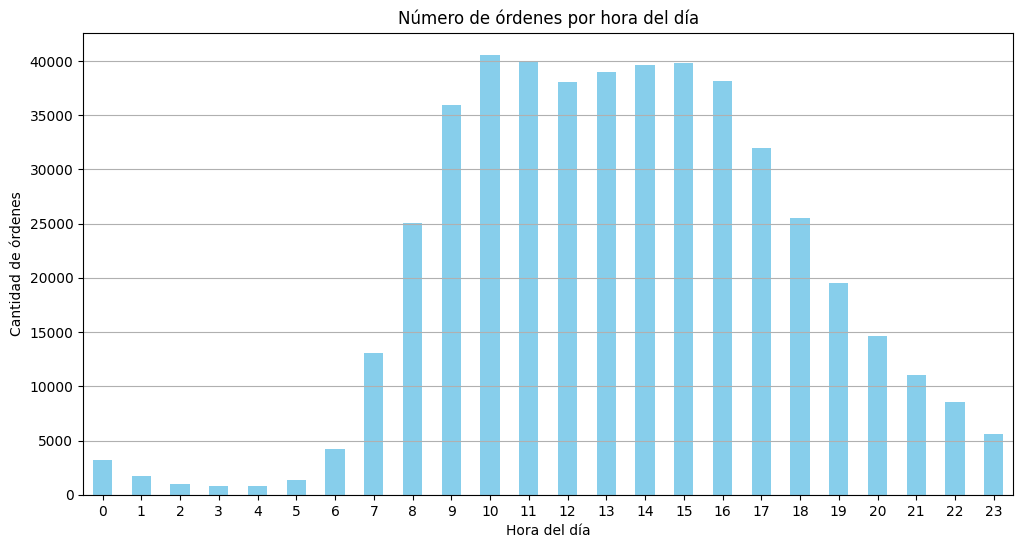

In [38]:
from matplotlib import pyplot as plt

orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12,6))
orders_by_hour.plot(kind='bar', color='skyblue')
plt.title('Número de órdenes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de órdenes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


En el gráfico podemos ver entre las 9 - 16 horas se hacen la mayoría de pedidos

### [A3] ¿Qué día de la semana compran víveres las personas?

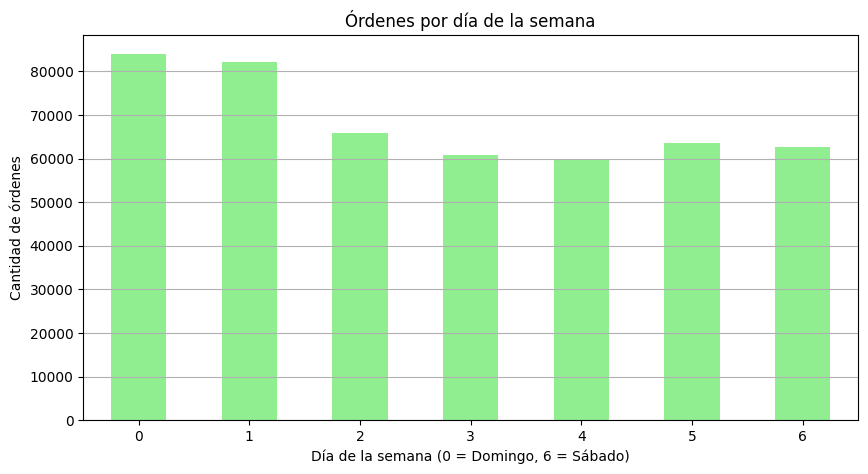

In [39]:
orders_by_day = orders['order_dow'].value_counts().sort_index()

plt.figure(figsize=(10,5))
orders_by_day.plot(kind='bar', color='lightgreen')
plt.title('Órdenes por día de la semana')
plt.xlabel('Día de la semana (0 = Domingo, 6 = Sábado)')
plt.ylabel('Cantidad de órdenes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Todos los días estan muy parejos pero se ve un incremento los días Domingo y Lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

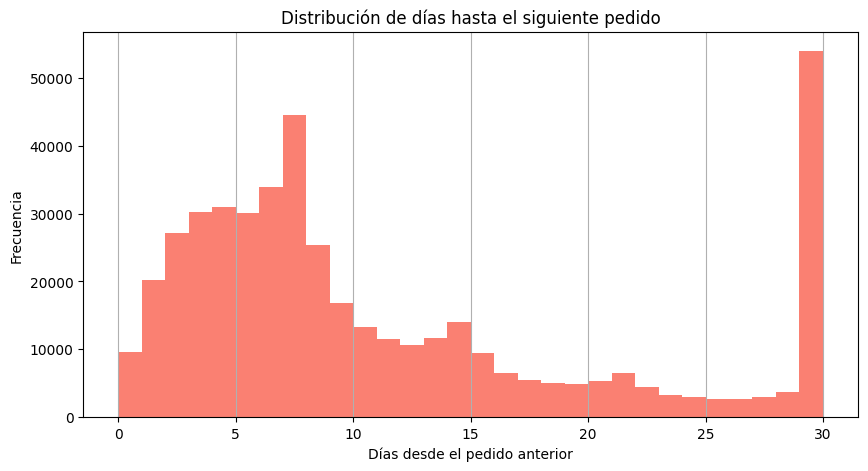

Valor mínimo: 0.0 días
Valor máximo: 30.0 días


In [40]:
plt.figure(figsize=(10,5))
orders['days_since_prior_order'].dropna().hist(bins=30, color='salmon')
plt.title('Distribución de días hasta el siguiente pedido')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

min_days = orders['days_since_prior_order'].min()
max_days = orders['days_since_prior_order'].max()
print(f"Valor mínimo: {min_days} días")
print(f"Valor máximo: {max_days} días")

El análisis del tiempo que esperan las personas hasta hacer otro pedido revela un patrón de recompra claramente definido: la mayoría de los pedidos se realizan entre 2 y 8 días después del anterior, con un pico muy marcado alrededor del día 6, lo que sugiere un hábito semanal de compra. También se observan pedidos realizados el mismo día (valor mínimo de 0 días), mientras que el valor máximo registrado es de 30 días. Este último podría deberse a una restricción del análisis, donde todos los valores superiores se agruparon en ese límite, lo que genera un pico artificial en el gráfico. En general, los resultados muestran un comportamiento recurrente y predecible en los ciclos de compra, aunque con una distribución dispersa en los periodos más largos.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

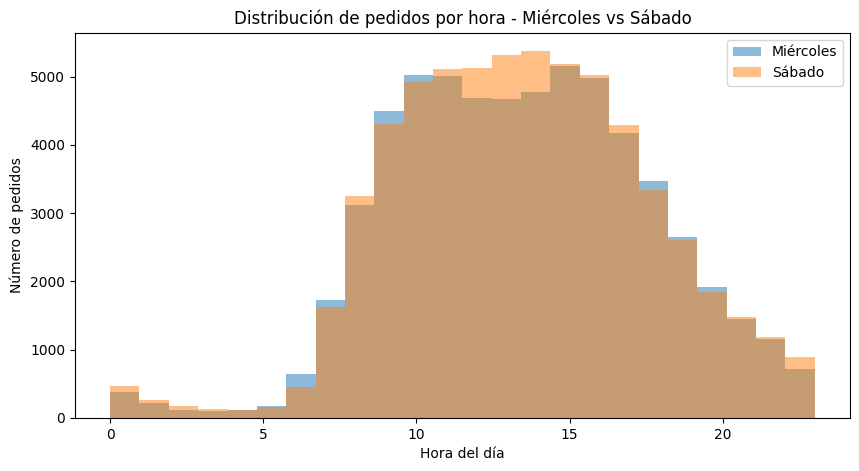

In [41]:
wednesday_orders = orders[orders['order_dow'] == 3]  # 0=Domingo, 3=Miércoles
saturday_orders = orders[orders['order_dow'] == 6]  # 6=Sábado

plt.figure(figsize=(10,5))
plt.hist(wednesday_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Miércoles')
plt.hist(saturday_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Distribución de pedidos por hora - Miércoles vs Sábado')
plt.legend()
plt.show()

La gráfica muestra la distribución del número de pedidos realizados por hora del día, comparando los miércoles y sábados. Se observa que en ambos días, la actividad de pedidos comienza a incrementarse significativamente a partir de las 7 a.m., alcanzando su punto máximo entre las 10 a.m. y las 15 p.m. Este comportamiento sugiere que los usuarios tienden a realizar la mayor parte de sus pedidos durante las horas medias del día. Aunque los patrones son muy similares, los sábados tienden a tener un volumen ligeramente mayor de pedidos en la mayoría de las horas, lo que podría indicar una mayor disponibilidad de tiempo libre por parte de los usuarios para hacer compras durante el fin de semana. Luego de las 17 horas, el número de pedidos comienza a descender progresivamente hasta alcanzar niveles bajos durante la madrugada en ambos días. En conclusión, tanto miércoles como sábados comparten un patrón de comportamiento muy similar, aunque los sábados reflejan una leve mayor actividad en general.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

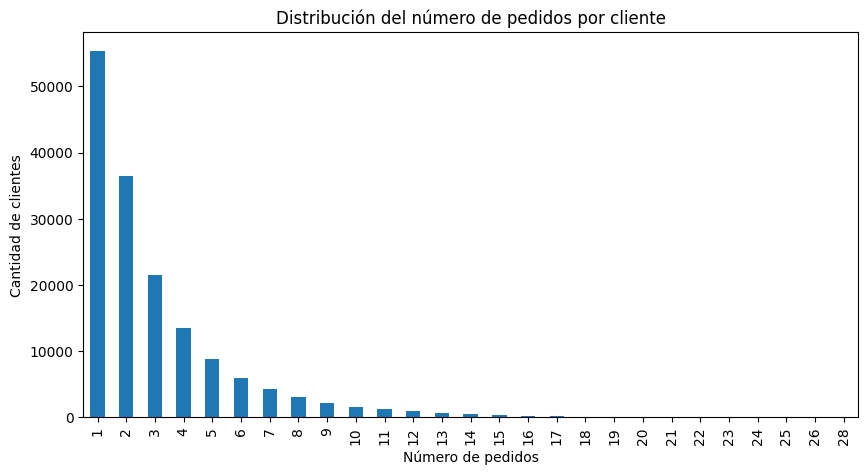

In [42]:
order_counts = orders.groupby('user_id')['order_id'].nunique()

plt.figure(figsize=(10,5))
order_counts.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Número de pedidos')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución del número de pedidos por cliente')
plt.show()

La mayoría de los clientes realiza entre 1 y 4 pedidos. Se observa una caída progresiva en la cantidad de clientes a medida que aumenta el número de pedidos, lo que indica que la base de clientes está compuesta principalmente por usuarios ocasionales o con bajo nivel de recurrencia.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [43]:
product_counts = order_products.groupby('product_id')['order_id'].count()
top_20_products = product_counts.sort_values(ascending=False).head(20).reset_index()
top_20_products = top_20_products.merge(products, on='product_id')[['product_id', 'product_name']]

print(top_20_products)

    product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        47626               Large Lemon
7        16797              Strawberries
8        26209                     Limes
9        27845        Organic Whole Milk
10       27966       Organic Raspberries
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       39275       Organic Blueberries
15       49683            Cucumber Kirby
16       28204        Organic Fuji Apple
17        5876             Organic Lemon
18        8277  Apple Honeycrisp Organic
19       40706    Organic Grape Tomatoes


Se puede ver que los productos más populares son los productos orgánicos

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

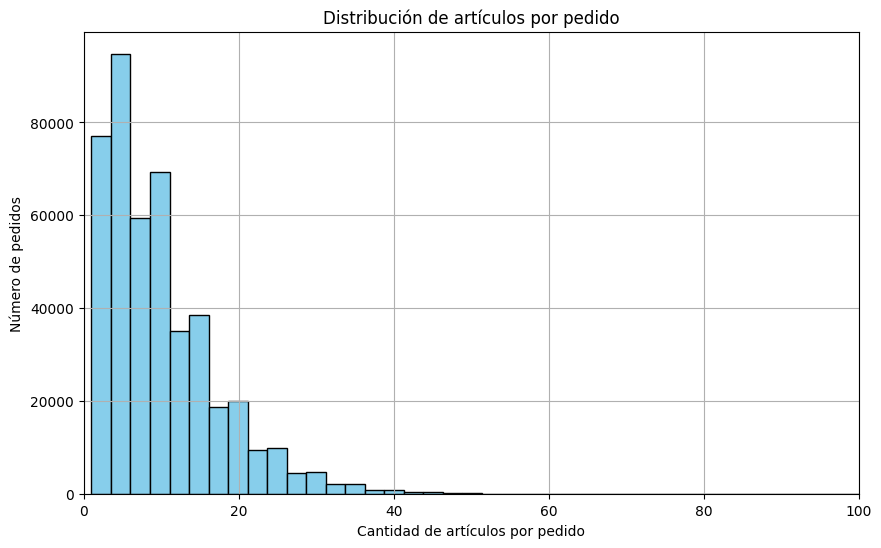

In [44]:
items_per_order = order_products.groupby('order_id').size()
items_per_order.describe()
plt.figure(figsize=(10,6))
plt.hist(items_per_order, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de artículos por pedido')
plt.xlabel('Cantidad de artículos por pedido')
plt.ylabel('Número de pedidos')
plt.xlim(0, 100)  
plt.grid(True)
plt.show()

La mayoría de los pedidos contienen entre 5 y 15 artículos, siendo este el rango más común entre los usuarios. La distribución es claramente asimétrica a la derecha, lo que indica que hay algunos pedidos con una cantidad considerablemente mayor de productos, aunque son poco frecuentes.
Esto sugiere que los usuarios tienden a hacer compras relativamente pequeñas o medianas, y solo una minoría realiza pedidos muy grandes.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [45]:
reordered_products = order_products[order_products['reordered'] == 1]

In [46]:
reordered_counts = reordered_products['product_id'].value_counts().head(20)

In [47]:
top_20 = reordered_counts.reset_index()
top_20.columns = ['product_id', 'reorder_count']

top_20 = top_20.merge(products[['product_id', 'product_name']], on='product_id')

In [48]:
print(top_20[['product_id', 'product_name', 'reorder_count']])

    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic Fuji Apple           8989
16        8277  Apple Honeycrisp Organic        

Los productos que más se reordenan son en su mayoría alimentos frescos y orgánicos, lo que indica que los usuarios tienden a repetir este tipo de compras con frecuencia. Entre los más destacados se encuentran la Banana (ID 24852) con 55,763 reordenes, la Bag of Organic Bananas (ID 13176) con 44,450 y las Organic Strawberries (ID 21137) con 28,639. Este comportamiento sugiere que los usuarios tienen hábitos de compra regulares, especialmente en productos perecederos que suelen consumirse de manera cotidiana.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [49]:

total_orders = order_products.groupby('product_id').size()


reorders = order_products.groupby('product_id')['reordered'].sum()


reorder_ratio = (reorders / total_orders).reset_index()
reorder_ratio.columns = ['product_id', 'reorder_ratio']


reorder_ratio = reorder_ratio.merge(products[['product_id', 'product_name']], on='product_id')


reorder_ratio.sort_values('reorder_ratio', ascending=False).head(20)

,product_id,reorder_ratio,product_name
13453,14721,1.0,Bone Strength Take Care
19195,20949,1.0,Vanilla Sandwich Cookies
6136,6723,1.0,Palmiers- Petite
6144,6732,1.0,Naturally Sparkling Mineral Water
41319,45088,1.0,California Dill Pollen & Garlic Goat Cheese & ...
41310,45078,1.0,Pomegranatea
19258,21016,1.0,Parchment Lined 8 in x 3.75 in x 2.5 in Pans
19248,21005,1.0,Peanut Butter Pie Ice Cream
32273,35192,1.0,Chocolate Soy Milk Singles
32277,35197,1.0,Mocha Chocolate Chip Organic Non-Dairy Frozen...


Los productos con mayor proporción de reorden alcanzan un valor de 1.0, lo que indica que siempre que fueron comprados, también fueron reordenados. Entre ellos se encuentran artículos como Bone Strength Take Care, Vanilla Sandwich Cookies o Coffee Flavor Yogurt. Este comportamiento puede reflejar una fuerte lealtad de ciertos usuarios hacia productos muy específicos.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [50]:
merged = order_products.merge(orders[['order_id', 'user_id']], on='order_id')



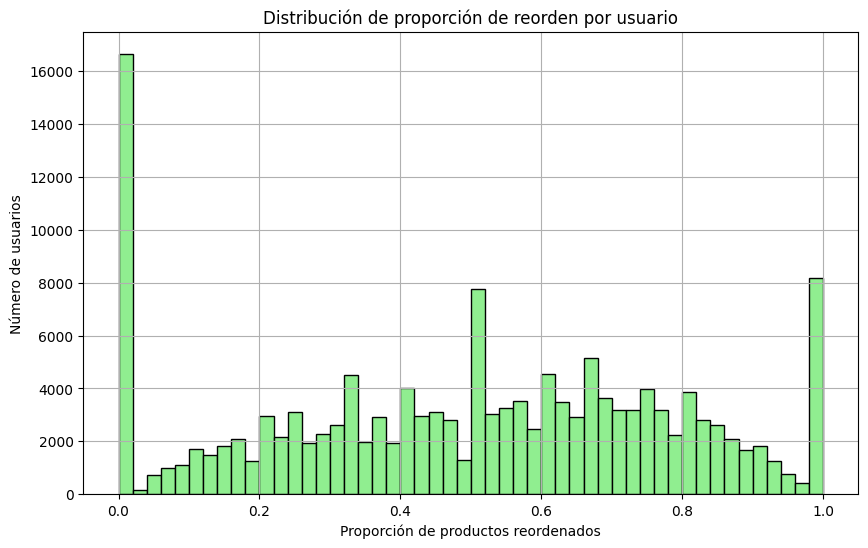

In [51]:
total_by_user = merged.groupby('user_id').size()


reordered_by_user = merged.groupby('user_id')['reordered'].sum()


user_reorder_ratio = (reordered_by_user / total_by_user).reset_index()
user_reorder_ratio.columns = ['user_id', 'reorder_ratio']

plt.figure(figsize=(10,6))
plt.hist(user_reorder_ratio['reorder_ratio'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribución de proporción de reorden por usuario')
plt.xlabel('Proporción de productos reordenados')
plt.ylabel('Número de usuarios')
plt.grid(True)
plt.show()

La distribución de la proporción de productos reordenados por usuario muestra un comportamiento diverso. Se observa un pico significativo en 0.0, lo que indica que muchos usuarios compraron productos completamente nuevos en sus pedidos. También hay un pico notable en 1.0, correspondiente a usuarios que solo reordenaron productos previamente comprados. El resto de usuarios se distribuye de manera bastante uniforme entre ambos extremos, lo cual sugiere una mezcla de comportamientos: algunos tienden a repetir sus compras mientras que otros combinan productos nuevos con habituales.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [52]:
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]


first_counts = first_in_cart['product_id'].value_counts().head(20)


first_counts = first_counts.reset_index()
first_counts.columns = ['product_id', 'first_position_count']

top_first_products = first_counts.merge(products[['product_id', 'product_name']], on='product_id')


print(top_first_products[['product_id', 'product_name', 'first_position_count']])

    product_id                 product_name  first_position_count
0        24852                       Banana                 15562
1        13176       Bag of Organic Bananas                 11026
2        27845           Organic Whole Milk                  4363
3        21137         Organic Strawberries                  3946
4        47209         Organic Hass Avocado                  3390
5        21903         Organic Baby Spinach                  3336
6        47766              Organic Avocado                  3044
7        19660                 Spring Water                  2336
8        16797                 Strawberries                  2308
9        27966          Organic Raspberries                  2024
10       44632   Sparkling Water Grapefruit                  1914
11       49235          Organic Half & Half                  1797
12       47626                  Large Lemon                  1737
13         196                         Soda                  1733
14       3

Los productos que con mayor frecuencia son añadidos en primer lugar al carrito suelen ser alimentos frescos y básicos. En primer lugar se encuentra Banana (ID 24852), con más de 15,000 veces siendo el primer producto agregado. Le siguen Bag of Organic Bananas, Organic Whole Milk y Organic Strawberries. Esta tendencia indica que los usuarios priorizan ciertos productos recurrentes o esenciales al comenzar sus compras, probablemente porque son parte habitual de su dieta.

### Conclusion general del proyecto:

Este análisis del comportamiento de compra de los usuarios en Instacart revela patrones claros y consistentes. La mayoría de los pedidos contienen entre 5 y 15 productos, y los artículos más comprados y reordenados suelen ser alimentos frescos y orgánicos, como bananas, fresas y leche. Los usuarios muestran una fuerte tendencia a repetir compras anteriores, especialmente en productos esenciales, y muchos tienden a agregar estos artículos al carrito en primer lugar. Al observar la proporción de reorden a nivel de usuario, encontramos que existen tanto clientes leales a sus productos habituales como otros más exploradores. En conjunto, los datos reflejan hábitos de consumo frecuentes, consistentes y predecibles que pueden ser aprovechados para personalizar recomendaciones y mejorar la experiencia de compra.